In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Students/bdastudents.csv', sep=';',)
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,5,3,3,1,1,3,4,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,4,3,2,2,3,3,10,1,1,1
3,GP,F,15,U,1,T,4,2,health,services,...,3,2,2,1,1,5,2,2,1,2
4,GP,F,16,U,1,T,3,3,other,other,...,4,3,2,1,2,5,4,0,1,1


In [202]:
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [225]:
print('Number of istances: ', len(dataset))
print('The dataset is balanced w.r.t. the school: ', dataset['school'].value_counts().to_list())
print('The dataset is balanced w.r.t  the sex: ', dataset['sex'].value_counts().to_list())

Number of istances:  1044
The dataset is balanced w.r.t. the school:  [772, 272]
The dataset is balanced w.r.t  the sex:  [591, 453]


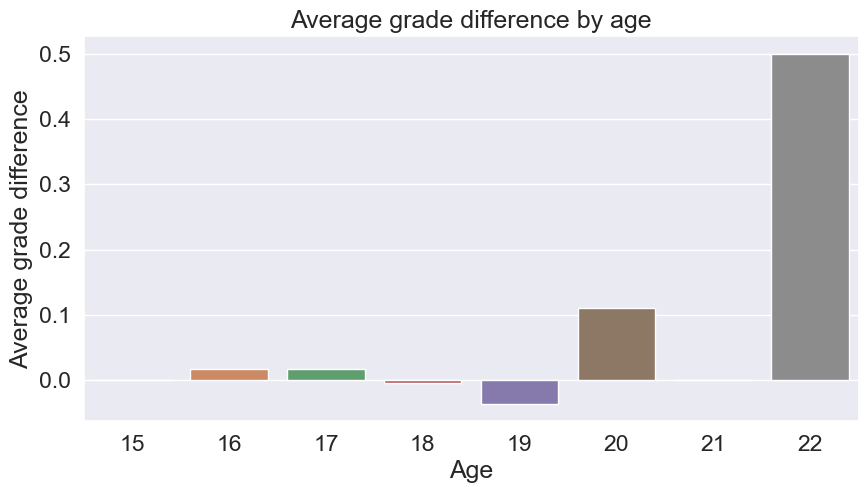

In [204]:
dataset['GRate']=dataset['G2']-dataset['G1']
agedif=dataset.groupby('age')['GRate'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=agedif.index, y=agedif.values)
plt.title('Average grade difference by age')
plt.xlabel('Age')
plt.ylabel('Average grade difference')
plt.show()

In [205]:
gender_avg = dataset.groupby('sex')['G3'].mean()
school_avg = dataset.groupby('school')['G3'].mean()
gender_avg
school_avg

school
GP    1.139896
MS    1.055147
Name: G3, dtype: float64

C:\Users\dany0\AppData\Local\Temp\ipykernel_17752\1027495817.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  parent_edu_avg = dataset.groupby('sex')['Medu', 'Fedu'].mean()


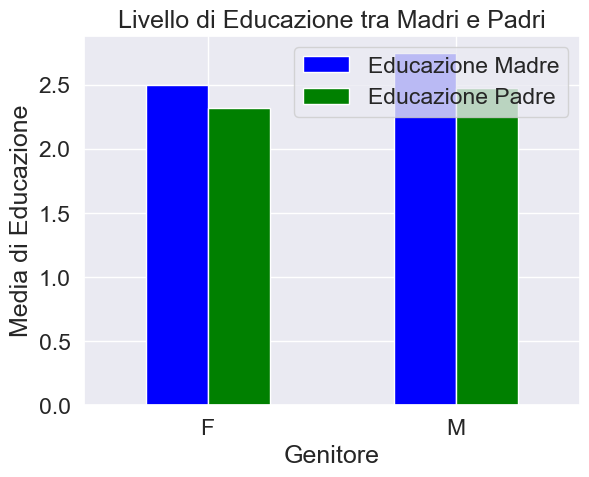

In [206]:
parent_edu_avg = dataset.groupby('sex')['Medu', 'Fedu'].mean()

parent_edu_avg.plot(kind="bar", color=["blue", "green"])
plt.xlabel("Genitore")
plt.ylabel("Media di Educazione")
plt.title("Livello di Educazione tra Madri e Padri")
plt.xticks(rotation=0)
plt.legend(["Educazione Madre", "Educazione Padre"])
plt.show()



<AxesSubplot:xlabel='G3,address'>

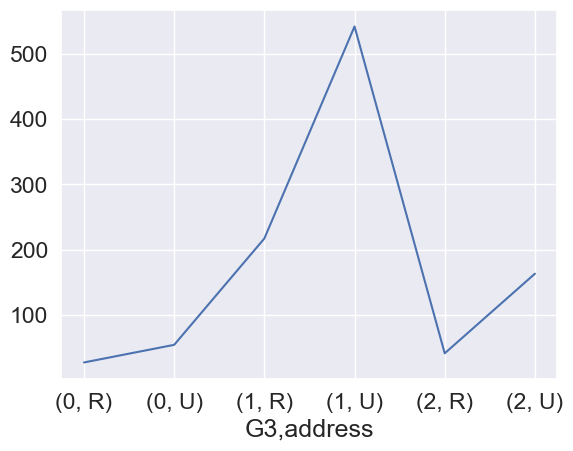

In [207]:
dataset["G3"].groupby([dataset["G3"],dataset["address"]] ).count().plot()

In [208]:
numeric = dataset.select_dtypes(include=[np.number])
label = numeric['G3']
numeric= numeric.drop(['G3'], axis=1)
reduced = numeric[['G1', 'G2']]
less_reduced = numeric.drop(['G1', 'G2'], axis=1)


In [209]:
from sklearn.model_selection import train_test_split

# Split the data of numeric, label, reduced, less_reduced
X_train, X_test, y_train, y_test = train_test_split(numeric, label, test_size=1/3, random_state=42)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(reduced, label, test_size=1/3, random_state=42)
X_train_less_reduced, X_test_less_reduced, y_train_less_reduced, y_test_less_reduced = train_test_split(less_reduced, label, test_size=1/3, random_state=42)


In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
logreg = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=10000)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on numeric test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

# Logistic Regression with reduced features
logreg.fit(X_train_reduced, y_train_reduced)
y_pred_reduced = logreg.predict(X_test_reduced)
print('Accuracy of logistic regression classifier on reduced test set: {:.2f}'.format(accuracy_score(y_test_reduced, y_pred_reduced)))

# Logistic Regression with less reduced features
logreg.fit(X_train_less_reduced, y_train_less_reduced)
y_pred_less_reduced = logreg.predict(X_test_less_reduced)
print('Accuracy of logistic regression classifier on less reduced test set: {:.2f}'.format(accuracy_score(y_test_less_reduced, y_pred_less_reduced)))



Accuracy of logistic regression classifier on numeric test set: 0.90
Accuracy of logistic regression classifier on reduced test set: 0.91
Accuracy of logistic regression classifier on less reduced test set: 0.74


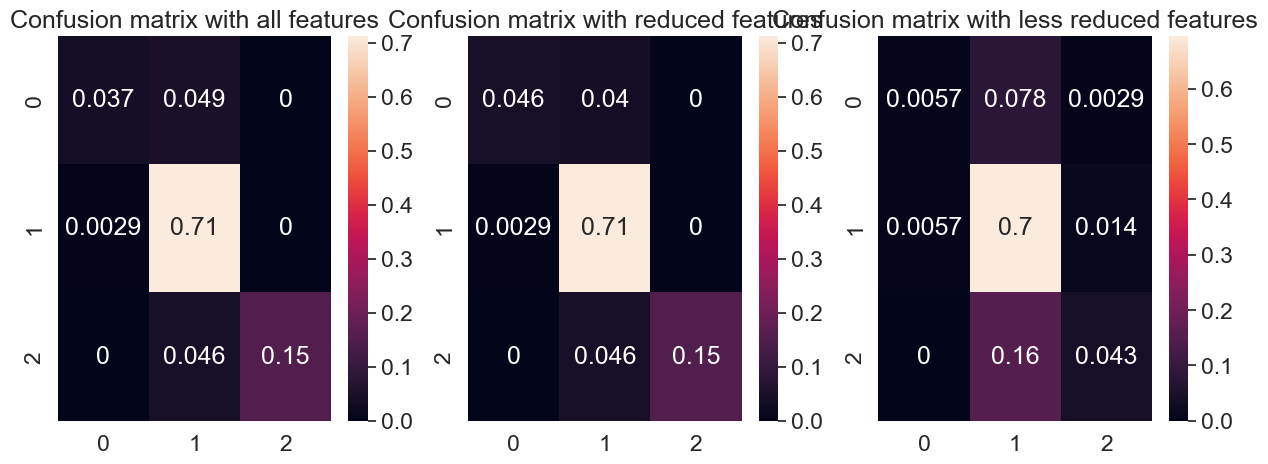

In [211]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap


#plot all confusion matrix
fig, ax = plt.subplots(1,3, figsize=(15,5))
heatmap(confusion_matrix(y_test, y_pred, normalize='all'), annot=True, ax=ax[0])
heatmap(confusion_matrix(y_test_reduced, y_pred_reduced, normalize='all'), annot=True, ax=ax[1])
heatmap(confusion_matrix(y_test_less_reduced, y_pred_less_reduced, normalize='all'), annot=True, ax=ax[2])
ax[0].set_title('Confusion matrix with all features')
ax[1].set_title('Confusion matrix with reduced features')
ax[2].set_title('Confusion matrix with less reduced features')
plt.show()


In [212]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Cross validation with Decision Tree of all dataset
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, numeric, label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, reduced, label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(clf, less_reduced, label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.84 (+/- 0.10)
Accuracy: 0.91 (+/- 0.05)
Accuracy: 0.68 (+/- 0.11)


In [213]:
#Discretization of age
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
est.fit(numeric[['age']])
numeric['age'] = est.transform(numeric[['age']])
numeric.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,GRate
0,1.0,1,4,4,2,2,0,1,0,0,...,4,3,4,1,1,3,6,0,0,0
1,1.0,1,1,1,1,2,0,0,1,0,...,5,3,3,1,1,3,4,0,0,0
2,0.0,0,1,1,1,2,3,1,0,1,...,4,3,2,2,3,3,10,1,1,0
3,0.0,1,4,2,1,3,0,0,1,1,...,3,2,2,1,1,5,2,2,1,-1
4,0.0,1,3,3,1,2,0,0,1,1,...,4,3,2,1,2,5,4,0,1,1


In [214]:
scores = cross_val_score(clf, numeric, label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.10)


In [215]:
#One hot Encoding of age
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(numeric[['age']])
numeric_hot = numeric.join(pd.DataFrame(enc.transform(numeric[['age']]).toarray(), columns=['age_1', 'age_2', 'age_3', 'age_4']))
numeric_hot = numeric_hot.drop(['age'], axis=1)

scores = cross_val_score(clf, numeric_hot, label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.10)


In [216]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GRate
0,GP,F,18,U,1,A,4,4,at_home,teacher,...,3,4,1,1,3,6,0,0,0,0
1,GP,F,17,U,1,T,1,1,at_home,other,...,3,3,1,1,3,4,0,0,0,0
2,GP,F,15,U,0,T,1,1,at_home,other,...,3,2,2,3,3,10,1,1,1,0
3,GP,F,15,U,1,T,4,2,health,services,...,2,2,1,1,5,2,2,1,2,-1
4,GP,F,16,U,1,T,3,3,other,other,...,3,2,1,2,5,4,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,1,T,2,3,services,other,...,4,2,1,2,5,4,1,1,1,0
1040,MS,F,18,U,0,T,3,1,teacher,services,...,3,4,1,1,1,4,2,2,2,0
1041,MS,F,18,U,1,T,1,1,other,other,...,1,1,1,1,5,6,1,1,1,0
1042,MS,M,17,U,0,T,3,1,services,services,...,4,5,3,4,2,6,1,1,1,0


In [217]:
#Add encoded features Mjob and Fjob to numeric dataset
enc.fit(dataset[['Mjob']])
numeric_job = numeric.join(pd.DataFrame(enc.transform(dataset[['Mjob']]).toarray(), columns=['Mjob_0', 'Mjob_1', 'Mjob_2', 'Mjob_3', 'Mjob_4']))
enc.fit(dataset[['Fjob']])
numeric_job = numeric_job.join(pd.DataFrame(enc.transform(dataset[['Fjob']]).toarray(), columns=['Fjob_0', 'Fjob_1', 'Fjob_2', 'Fjob_3', 'Fjob_4']))


In [218]:
numeric_job.head()

,age,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_0,Mjob_1,Mjob_2,Mjob_3,Mjob_4,Fjob_0,Fjob_1,Fjob_2,Fjob_3,Fjob_4
0,1.0,1,4,4,2,2,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1,1,1,1,2,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0,1,1,1,2,3,1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1,4,2,1,3,0,0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1,3,3,1,2,0,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [219]:
scores = cross_val_score(clf, numeric_job, label, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.10)


In [220]:
data_GP = dataset.select_dtypes(include=[np.number])[dataset['school'] == 'GP']
data_MS = dataset.select_dtypes(include=[np.number])[dataset['school'] == 'MS']
label_GP = data_GP['G3']
label_MS = data_MS['G3']
data_GP = data_GP.drop(['G3'], axis=1)
data_MS = data_MS.drop(['G3'], axis=1)

X_train_GP, X_test_GP, y_train_GP, y_test_GP = train_test_split(data_GP, label_GP, test_size=1/3, random_state=42)
X_train_MS, X_test_MS, y_train_MS, y_test_MS = train_test_split(data_MS, label_MS, test_size=1/3, random_state=42)

tree_GP = DecisionTreeClassifier()
tree_MS = DecisionTreeClassifier()

tree_GP.fit(X_train_GP, y_train_GP)
tree_MS.fit(X_train_MS, y_train_MS)

X_test = pd.concat([X_test_GP, X_test_MS])
y_test = pd.concat([y_test_GP, y_test_MS])

scores_GP = cross_val_score(tree_GP, X_test, y_test, cv=10)
scores_MS = cross_val_score(tree_MS, X_test, y_test, cv=10)
print("Accuracy GP: %0.2f (+/- %0.2f)" % (scores_GP.mean(), scores_GP.std() * 2))
print("Accuracy MS: %0.2f (+/- %0.2f)" % (scores_MS.mean(), scores_MS.std() * 2))




Accuracy GP: 0.79 (+/- 0.14)
Accuracy MS: 0.80 (+/- 0.15)


In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(numeric, label, test_size=1/3)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_rounded = np.round(y_pred)
accuracy = reg.score(X_test, y_test)
print("Accuracy: %0.2f" % (accuracy))
mse = mean_squared_error(y_test, y_pred_rounded)
print("MSE:", mse)

Accuracy: 0.71
MSE: 0.07758620689655173
